In [298]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [299]:
# Calling dataset
dd=pd.read_excel('Train A Doctor Consultation Fee.xlsx')

In [300]:
dd

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250
...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19 years experience,98%,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300
5957,MBBS,33 years experience,NaN,"Nungambakkam, Chennai",General Medicine,NaN,100
5958,MBBS,41 years experience,97%,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600
5959,"MBBS, MD - General Medicine",15 years experience,90%,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100


Observation - The dataset have 5961 rows and 7 columns. The target variable is fees which is continous value so this is regression problem. 

Qualification: Qualification and degrees held by the doctor

Experience: Experience of the doctor in number of years

Rating: Rating given by patients

Profile: Type of the doctor

Miscellaeous_Info: Extra information about the doctor

Fees: Fees charged by the doctor

Place: Area and the city where the doctor is located.

In [301]:
# Checking null values
dd.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

In [302]:
dd.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info', 'Fees'],
      dtype='object')

In [303]:
# Checking daya type
dd.dtypes

Qualification         object
Experience            object
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
Fees                   int64
dtype: object

All the columns has object data type except Fees

In [304]:
# Checking unique values

for i in dd.columns:
    if dd[i].dtype==object:
        print(dd[i].value_counts())
        print('****************************************')
        print('\n')

BDS                                                                                                                                  488
BHMS                                                                                                                                 477
BAMS                                                                                                                                 471
MBBS                                                                                                                                 334
MBBS, MS - ENT                                                                                                                       220
                                                                                                                                    ... 
MS - Ayurvedic Gynecology & Obstetrics, BAMS                                                                                           1
BDS, MDS - Oral Medicine and Radiology, F

In [305]:
# Checking unique values of fee column

dd['Fees'].value_counts()

100    1306
500     938
200     904
300     864
400     424
250     307
150     253
600     215
700     153
800     143
350     143
50       81
450      65
750      34
550      22
650      21
900      18
70       18
80       12
60       11
30        4
10        2
260       2
130       2
180       2
40        2
380       2
220       1
280       1
499       1
5         1
920       1
299       1
125       1
230       1
430       1
630       1
850       1
950       1
20        1
Name: Fees, dtype: int64

Observation - 950 is highest fee and 5 is lowest fee.

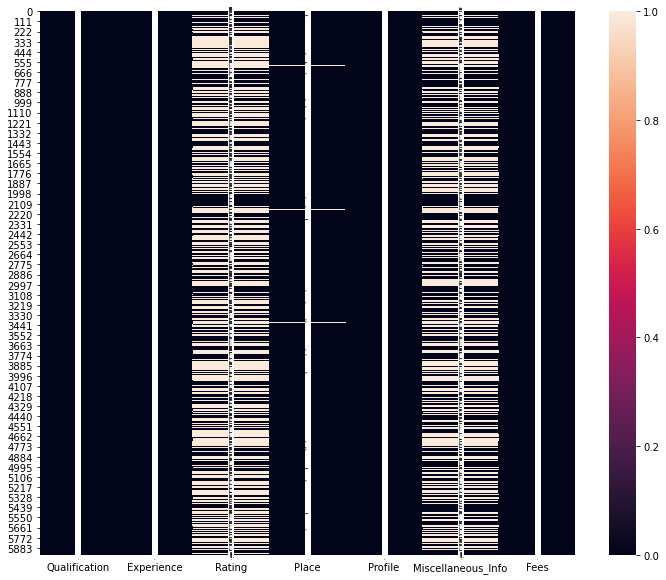

In [306]:
# Checking null values using heatmap

import seaborn as sns
import matplotlib.pyplot as plt
plt.subplots(figsize=(12,10))
sns.heatmap(dd.isnull(),annot=True)

Observation - The above graph shows missing values present in 3 columns.

# Univariate Analysis

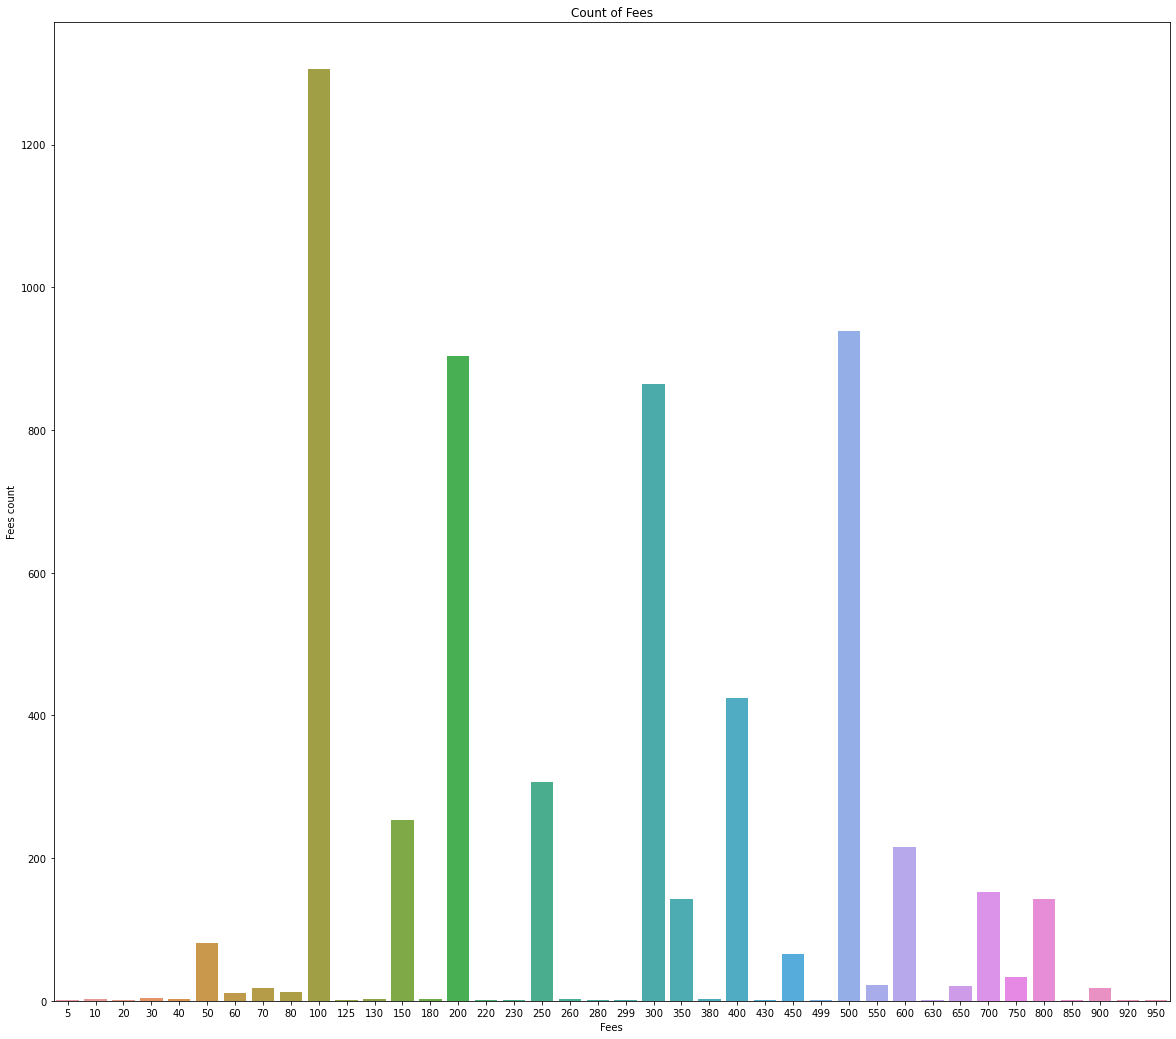

100    1306
500     938
200     904
300     864
400     424
250     307
150     253
600     215
700     153
800     143
350     143
50       81
450      65
750      34
550      22
650      21
900      18
70       18
80       12
60       11
30        4
10        2
260       2
130       2
180       2
40        2
380       2
220       1
280       1
499       1
5         1
920       1
299       1
125       1
230       1
430       1
630       1
850       1
950       1
20        1
Name: Fees, dtype: int64


In [307]:
# Checking Fees count

plt.subplots(figsize=(20,18))
sns.countplot(x='Fees',data=dd)
plt.title('Count of Fees')
plt.xlabel('Fees')
plt.ylabel('Fees count')
plt.show()

print(dd.Fees.value_counts())

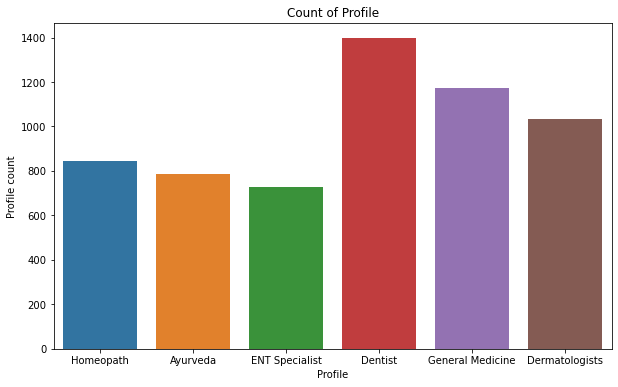

Dentist             1397
General Medicine    1173
Dermatologists      1034
Homeopath            843
Ayurveda             786
ENT Specialist       728
Name: Profile, dtype: int64


In [308]:
# Checking Profile count

plt.subplots(figsize=(10,6))
sns.countplot(x='Profile',data=dd)
plt.title('Count of Profile')
plt.xlabel('Profile')
plt.ylabel('Profile count')
plt.show()

print(dd.Profile.value_counts())

In [309]:
from sklearn.impute import SimpleImputer

imp=SimpleImputer(strategy='most_frequent')
dd['Place']=imp.fit_transform(dd['Place'].values.reshape(-1,1))
dd.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                    0
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

In [310]:
# Now divide area and city column separately

area=list(dd['Place'])

        
location=[]
city=[]

for i in range(len(area)):
    location.append(area[i].split(sep=",")[0])
    city.append(area[i].split(sep=',')[-1])

In [311]:
dd['location']=location
dd['city']=city

In [312]:
dd

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,location,city
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Kakkanad,Ernakulam
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Whitefield,Bangalore
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,Mathikere - BEL,Bangalore
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bannerghatta Road,Bangalore
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,Keelkattalai,Chennai
...,...,...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19 years experience,98%,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300,Basavanagudi,Bangalore
5957,MBBS,33 years experience,NaN,"Nungambakkam, Chennai",General Medicine,NaN,100,Nungambakkam,Chennai
5958,MBBS,41 years experience,97%,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600,Greater Kailash Part 2,Delhi
5959,"MBBS, MD - General Medicine",15 years experience,90%,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100,Vileparle West,Mumbai


In [313]:
dd['city'].value_counts()

 Bangalore             1283
 Mumbai                1219
 Delhi                 1185
 Hyderabad              951
 Chennai                855
 Coimbatore             228
 Ernakulam              153
 Thiruvananthapuram      86
e                         1
Name: city, dtype: int64

In [314]:
dd['location'].value_counts()

HSR Layout         100
Andheri West        70
Dwarka              68
Banjara Hills       64
Mulund West         54
                  ... 
Perumathura          1
Rohini Sector 8      1
Bakkarwala           1
Kishanbagh           1
Geeta Colony         1
Name: location, Length: 866, dtype: int64

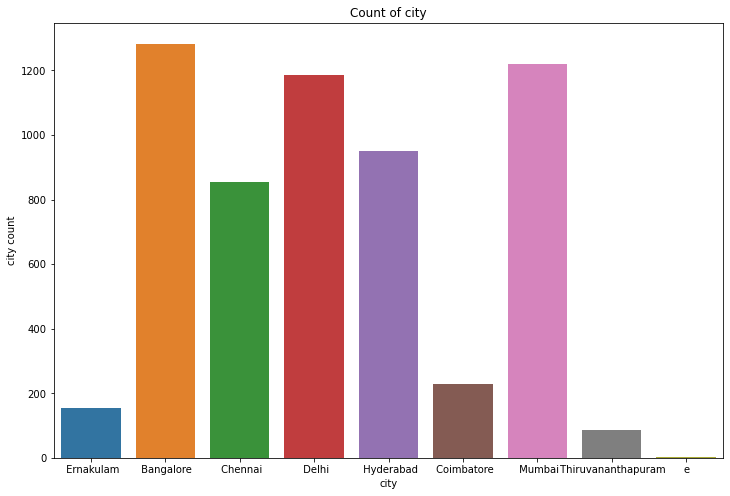

 Bangalore             1283
 Mumbai                1219
 Delhi                 1185
 Hyderabad              951
 Chennai                855
 Coimbatore             228
 Ernakulam              153
 Thiruvananthapuram      86
e                         1
Name: city, dtype: int64


In [315]:
# Checking city count

plt.subplots(figsize=(12,8))
sns.countplot(x='city',data=dd)
plt.title('Count of city')
plt.xlabel('city')
plt.ylabel('city count')
plt.show()

print(dd.city.value_counts())

In [316]:
# Removing  'years experience' from experience column 

dd['Experience']=dd['Experience'].replace(' years experience','',regex=True)
dd['Experience'] = dd['Experience'].astype(int)

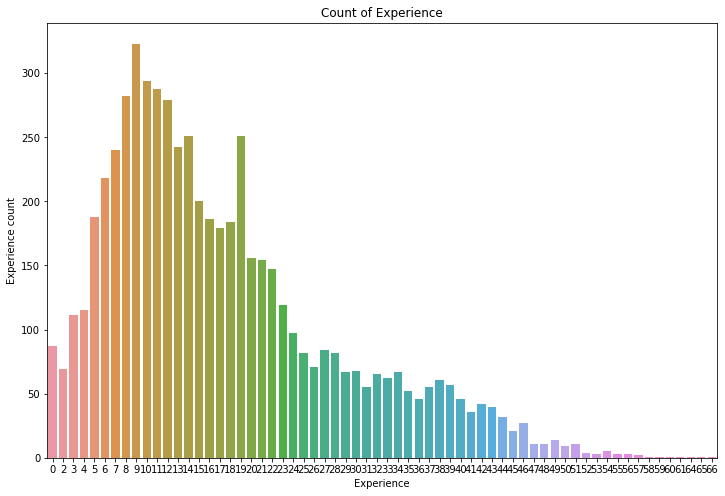

9     323
10    294
11    288
8     282
12    279
     ... 
64      1
65      1
58      1
66      1
61      1
Name: Experience, Length: 64, dtype: int64


In [317]:
# Checking experience count

plt.subplots(figsize=(12,8))
sns.countplot(x='Experience',data=dd)
plt.title('Count of Experience')
plt.xlabel('Experience')
plt.ylabel('Experience count')
plt.show()

print(dd.Experience.value_counts())

In [318]:
imp=SimpleImputer(strategy='most_frequent')
dd['Rating']=imp.fit_transform(dd['Rating'].values.reshape(-1,1))

# Removing  '%' from Rating column 

dd['Rating']=dd['Rating'].replace('%','',regex=True)

dd['Rating'] = dd['Rating'].astype(int)

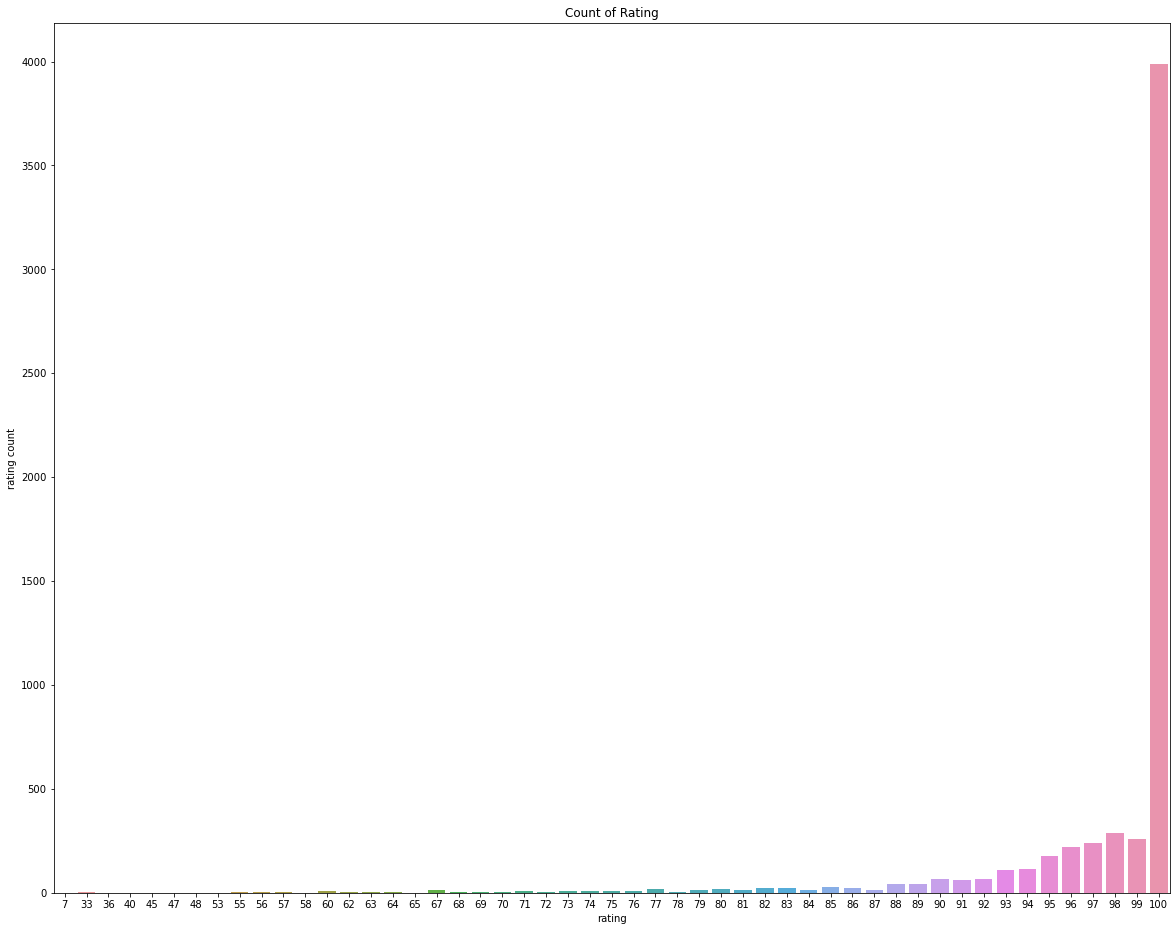

100    3986
98      290
99      259
97      241
96      220
95      178
94      115
93      109
92       66
90       66
91       60
89       42
88       41
85       27
82       23
83       21
86       21
80       19
77       16
87       14
84       13
79       13
67       12
81       12
71        9
76        9
75        8
73        8
74        7
60        7
78        6
56        5
68        5
69        4
70        4
57        3
72        3
33        2
64        2
62        2
63        2
55        2
48        1
40        1
7         1
65        1
45        1
53        1
47        1
58        1
36        1
Name: Rating, dtype: int64


In [319]:
# Checking rating count

plt.subplots(figsize=(20,16))
sns.countplot(x='Rating',data=dd)
plt.title('Count of Rating')
plt.xlabel('rating')
plt.ylabel('rating count')
plt.show()

print(dd.Rating.value_counts())

In [320]:
# Dropping Misc info and place column

dd.drop(['Place','Miscellaneous_Info'],axis=1,inplace=True)

In [321]:
dd

,Qualification,Experience,Rating,Profile,Fees,location,city
0,"BHMS, MD - Homeopathy",24,100,Homeopath,100,Kakkanad,Ernakulam
1,"BAMS, MD - Ayurveda Medicine",12,98,Ayurveda,350,Whitefield,Bangalore
2,"MBBS, MS - Otorhinolaryngology",9,100,ENT Specialist,300,Mathikere - BEL,Bangalore
3,"BSc - Zoology, BAMS",12,100,Ayurveda,250,Bannerghatta Road,Bangalore
4,BAMS,20,100,Ayurveda,250,Keelkattalai,Chennai
...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19,98,ENT Specialist,300,Basavanagudi,Bangalore
5957,MBBS,33,100,General Medicine,100,Nungambakkam,Chennai
5958,MBBS,41,97,General Medicine,600,Greater Kailash Part 2,Delhi
5959,"MBBS, MD - General Medicine",15,90,General Medicine,100,Vileparle West,Mumbai


In [322]:
# Convert profile column into numeric data

dd['Profile']=dd['Profile'].replace({'Dentist':0,'General Medicine':1,'Dermatologists':2,'Homeopath':3,'Ayurveda':4,'ENT Specialist':5})

In [323]:
dd.dtypes

Qualification    object
Experience        int32
Rating            int32
Profile           int64
Fees              int64
location         object
city             object
dtype: object

In [324]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
list1=['Qualification','location','city']

for val in list1:
    dd[val]=le.fit_transform(dd[val].astype(str))

In [325]:
dd

,Qualification,Experience,Rating,Profile,Fees,location,city
0,401,24,100,3,100,296,4
1,73,12,98,4,350,855,0
2,1135,9,100,5,300,452,0
3,464,12,100,4,250,68,0
4,10,20,100,4,250,335,1
...,...,...,...,...,...,...,...
5956,1075,19,98,5,300,70,0
5957,596,33,100,1,100,535,1
5958,596,41,97,1,600,215,3
5959,943,15,90,1,100,840,6


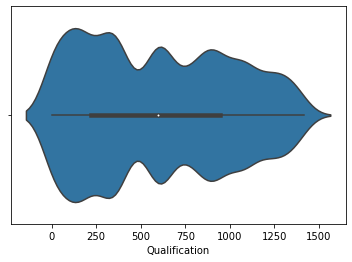

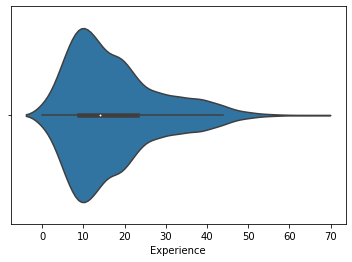

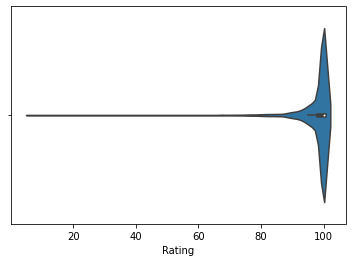

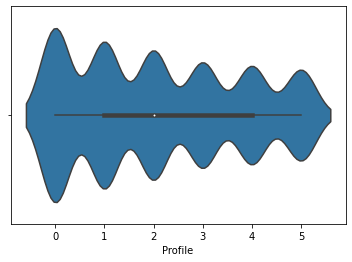

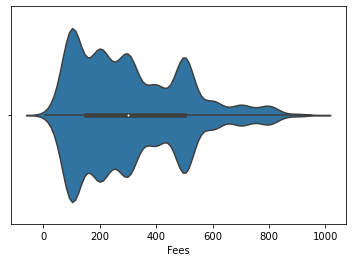

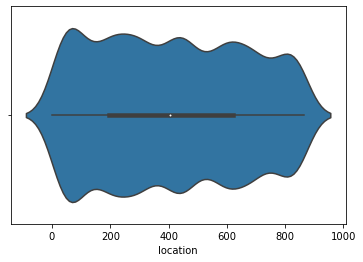

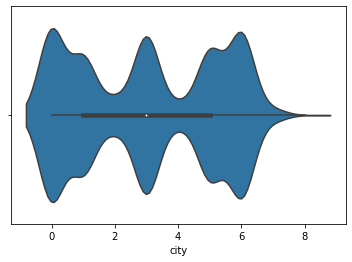

In [326]:
for i in dd.columns:
    sns.violinplot(dd[i])
    plt.show()

# Bivariate Analysis

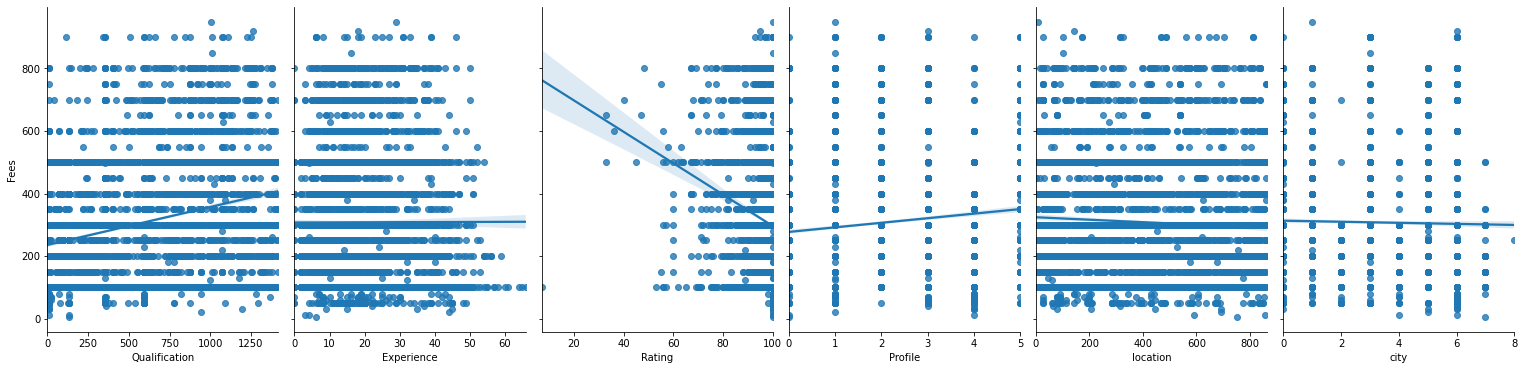

In [327]:
sns.pairplot(dd, x_vars=['Qualification', 'Experience', 'Rating', 'Profile', 'location','city'], y_vars='Fees' ,size=5, aspect=0.7, kind='reg')

In [328]:
dd.columns

Index(['Qualification', 'Experience', 'Rating', 'Profile', 'Fees', 'location',
       'city'],
      dtype='object')

In [330]:
dd.isnull().sum()

Qualification    0
Experience       0
Rating           0
Profile          0
Fees             0
location         0
city             0
dtype: int64

# Removing Outliers

In [331]:
from scipy.stats import zscore
z=np.abs(zscore(dd))
z

array([[4.73305738e-01, 6.00978850e-01, 4.06282226e-01, ...,
        1.08926083e+00, 4.47261369e-01, 4.14944278e-01],
       [1.26594438e+00, 4.76040293e-01, 6.62066312e-02, ...,
        2.20295441e-01, 1.74357712e+00, 1.32480100e+00],
       [1.30046489e+00, 7.45295079e-01, 4.06282226e-01, ...,
        4.16158134e-02, 1.64135417e-01, 1.32480100e+00],
       ...,
       [2.07239780e-03, 2.12675597e+00, 1.03831166e-01, ...,
        1.52985171e+00, 7.64717393e-01, 1.99920401e-02],
       [8.36481290e-01, 2.06785507e-01, 1.29409575e+00, ...,
        1.08926083e+00, 1.68478896e+00, 1.28481691e+00],
       [8.55125573e-01, 2.72823168e-02, 4.06282226e-01, ...,
        5.65438323e-01, 7.32420892e-01, 1.99920401e-02]])

In [332]:
threshold=3
print(np.where(z>3))

(array([  18,   55,   67,  105,  110,  140,  178,  183,  209,  275,  293,
        309,  325,  333,  372,  377,  458,  465,  585,  590,  632,  692,
        731,  787,  788,  810,  815,  851,  901,  911,  918,  968,  979,
        987,  990,  998, 1009, 1016, 1018, 1111, 1170, 1240, 1303, 1314,
       1392, 1425, 1433, 1437, 1444, 1475, 1592, 1594, 1614, 1631, 1635,
       1648, 1717, 1741, 1743, 1747, 1778, 1796, 1852, 1860, 1877, 1937,
       1981, 2023, 2062, 2089, 2161, 2165, 2202, 2252, 2262, 2277, 2281,
       2309, 2323, 2391, 2393, 2428, 2478, 2500, 2522, 2548, 2585, 2623,
       2631, 2646, 2670, 2708, 2715, 2726, 2738, 2758, 2829, 2833, 2962,
       2991, 3093, 3120, 3126, 3144, 3180, 3222, 3254, 3270, 3295, 3333,
       3365, 3367, 3463, 3478, 3493, 3526, 3537, 3593, 3604, 3608, 3615,
       3627, 3661, 3676, 3690, 3766, 3783, 3820, 3861, 3942, 3960, 4040,
       4052, 4055, 4058, 4135, 4167, 4174, 4212, 4212, 4219, 4257, 4344,
       4459, 4474, 4478, 4509, 4581, 4608, 4609, 4

In [333]:
dd_new=dd[(z<3).all(axis=1)]

In [334]:
dd_new.shape

(5767, 7)

In [335]:
dd.shape

(5961, 7)

In [336]:
dd=pd.DataFrame(data=dd_new)

Observation - Now approx 200 rows removed due to outliers present.

# Checking skewness

In [337]:
dd.skew()

Qualification    0.278898
Experience       0.918798
Rating          -2.696433
Profile          0.296117
Fees             0.725505
location         0.118220
city             0.001155
dtype: float64

In [338]:
# Treating skewness
dd.skew()
for col in dd.skew().index:
    if dd[col].skew()>0.55:
        dd[col]=np.sqrt(dd[col])
        if dd[col].skew()<-0.55:
            dd[col]=np.cbrt(dd[col]) 
            
        
        
        

In [339]:
dd.skew()

Qualification    0.278898
Experience       0.033997
Rating          -2.696433
Profile          0.296117
Fees             0.233100
location         0.118220
city             0.001155
dtype: float64

In [340]:
dd

,Qualification,Experience,Rating,Profile,Fees,location,city
0,401,4.898979,100,3,10.000000,296,4
1,73,3.464102,98,4,18.708287,855,0
2,1135,3.000000,100,5,17.320508,452,0
3,464,3.464102,100,4,15.811388,68,0
4,10,4.472136,100,4,15.811388,335,1
...,...,...,...,...,...,...,...
5956,1075,4.358899,98,5,17.320508,70,0
5957,596,5.744563,100,1,10.000000,535,1
5958,596,6.403124,97,1,24.494897,215,3
5959,943,3.872983,90,1,10.000000,840,6


In [341]:
# Separating data into input and output variables.

dd_x=dd.drop(columns=['Fees'])
y=pd.DataFrame(dd['Fees'])

In [342]:
y

,Fees
0,10.000000
1,18.708287
2,17.320508
3,15.811388
4,15.811388
...,...
5956,17.320508
5957,10.000000
5958,24.494897
5959,10.000000


In [343]:
# Scaling the input Variable

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(dd_x)
x=pd.DataFrame(x,columns=dd_x.columns)

In [344]:
x

,Qualification,Experience,Rating,Profile,location,city
0,-0.451294,0.763439,0.485641,0.533008,-0.448766,0.411833
1,-1.241049,-0.318413,-0.081703,1.121307,1.735829,-1.326851
2,1.316024,-0.668330,0.485641,1.709605,0.160888,-1.326851
3,-0.299603,-0.318413,0.485641,1.121307,-1.339800,-1.326851
4,-1.392740,0.441612,0.485641,1.121307,-0.296352,-0.892180
...,...,...,...,...,...,...
5762,1.171557,0.356235,-0.081703,1.709605,-1.331983,-1.326851
5763,0.018225,1.400981,0.485641,-0.643588,0.485256,-0.892180
5764,0.018225,1.897515,-0.365375,-0.643588,-0.765317,-0.022838
5765,0.853728,-0.010129,-2.351079,-0.643588,1.677208,1.281176


In [345]:
# Make input and output variables into train and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.20)

In [346]:
# Checking train and test data size
print(x_train.shape,'\t',x_test.shape)

(4613, 6) 	 (1154, 6)


In [347]:
print(y_train.shape,'\t',y_test.shape)

(4613, 1) 	 (1154, 1)


In [348]:
# Importing models library

from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
# Importing error metrics

from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score

In [349]:
# Using algorithms via for loop

model=[LinearRegression(),Lasso(),Ridge(),ElasticNet(),SVR(),KNeighborsRegressor(),DecisionTreeRegressor()]
for p in model:
    p.fit(x_train,y_train)
    print('Score of', p , 'is:' , p.score(x_train,y_train))
    predp=p.predict(x_test)
    print('Error:')
    print('Mean absolute error:', mean_absolute_error(y_test,predp))
    print('Mean squared error:', mean_squared_error(y_test,predp))
    print('Root Mean squared error:', np.sqrt(mean_squared_error(y_test,predp)))
    print('r2_score:', r2_score(y_test,predp))
    print('********************************************************************************************')
    print('\n')

Score of LinearRegression() is: 0.09430334635074655
Error:
Mean absolute error: 4.226381456502367
Mean squared error: 26.099710038087753
Root Mean squared error: 5.108787531116141
r2_score: 0.08537765944457709
********************************************************************************************


Score of Lasso() is: 0.02923423318398377
Error:
Mean absolute error: 4.38986790097572
Mean squared error: 27.68049548858388
Root Mean squared error: 5.261225664099943
r2_score: 0.0299815770153542
********************************************************************************************


Score of Ridge() is: 0.0943033429093515
Error:
Mean absolute error: 4.226389435649059
Mean squared error: 26.099692489262047
Root Mean squared error: 5.108785813602098
r2_score: 0.08537827441493562
********************************************************************************************


Score of ElasticNet() is: 0.05281154020601175
Error:
Mean absolute error: 4.324321027337734
Mean squared error:

In [350]:
# Finding out best paramter using GridsearchCV
from sklearn.model_selection import GridSearchCV
dt=DecisionTreeRegressor()
parameters={'random_state':range(42,100)}
gc=GridSearchCV(dt,parameters)
gc.fit(x,y)
gc.best_params_

{'random_state': 84}

In [351]:
#Using DecisionTreeRegressor model with best results

dtc=DecisionTreeRegressor(criterion='mae',random_state=84)
dtc.fit(x_train,y_train)
print('Score:', dtc.score(x_train,y_train))
preddt=dtc.predict(x_test)
print('\n')
print('Mean absolute error:', mean_absolute_error(y_test,preddt))
print('Mean squared error:', mean_squared_error(y_test,preddt))
print('Root Mean squared error:', np.sqrt(mean_squared_error(y_test,preddt)))
print('\n')
print('r2_score:', r2_score(y_test,preddt))

Score: 0.9969413928596209


Mean absolute error: 4.852727997483572
Mean squared error: 45.09644351918113
Root Mean squared error: 6.715388560551141


r2_score: -0.5803322972572329


Using Ensemble Technique to boostup score

In [352]:
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor(n_estimators=100,random_state=70)
rf.fit(x_train,y_train)
print('score:',rf.score(x_train,y_train))
predrf=rf.predict(x_test)
print('\n')
print('Mean absolute error:', mean_absolute_error(y_test,predrf))
print('Mean squared error:', mean_squared_error(y_test,predrf))
print('Root Mean squared error:', np.sqrt(mean_squared_error(y_test,predrf)))
print('\n')
print('r2_score:', r2_score(y_test,predrf))

score: 0.882261894431657


Mean absolute error: 3.810183707874488
Mean squared error: 23.7300839995009
Root Mean squared error: 4.871353405317756


r2_score: 0.1684173909393174


In [354]:
from sklearn.ensemble import AdaBoostRegressor


ad=AdaBoostRegressor(base_estimator=dtc,n_estimators=20,learning_rate=1.0,random_state=84)
ad.fit(x_train,y_train)
print('score:',ad.score(x_train,y_train))
predad=ad.predict(x_test)
print('\n')
print('Mean absolute error:', mean_absolute_error(y_test,predad))
print('Mean squared error:', mean_squared_error(y_test,predad))
print('Root Mean squared error:', np.sqrt(mean_squared_error(y_test,predad)))
print('\n')
print('r2_score:', r2_score(y_test,predad))

score: 0.99087236811381


Mean absolute error: 3.9505669971228254
Mean squared error: 29.806176515129902
Root Mean squared error: 5.4595033212857285


r2_score: -0.04450949407074534


In [355]:
# Cross validate of RandomForestRegressor
from sklearn.model_selection import cross_val_score
score=cross_val_score(ad,x,y,cv=5,scoring='r2')
print('Score:', score)
print('Mean Score:', score.std())
print('Standard Deviation:', score.std())

Score: [-0.06243205 -0.00770283 -0.02501795 -0.01571422  0.00522099]
Mean Score: 0.0229127456834754
Standard Deviation: 0.0229127456834754


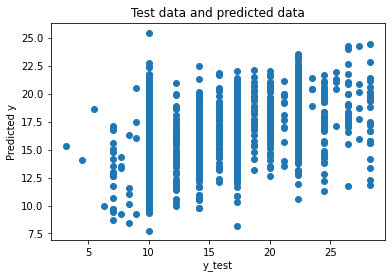

In [356]:
plt.scatter(y_test,predrf)
plt.xlabel('y_test')
plt.ylabel('Predicted y')
plt.title('Test data and predicted data')
plt.show()

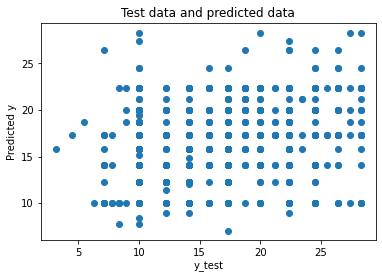

In [357]:
plt.scatter(y_test,predad)
plt.xlabel('y_test')
plt.ylabel('Predicted y')
plt.title('Test data and predicted data')
plt.show()

In [358]:
# Saving the AdaBoostRegressor
import joblib
joblib.dump(ad,'Train A Doctor Consultation Fee Evaluation project.pkl')

['Train A Doctor Consultation Fee Evaluation project.pkl']